In [67]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import FloatSlider, interact

plt.rcParams["image.cmap"] = "magma"
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["figure.dpi"] = 100

<IPython.core.display.Javascript object>


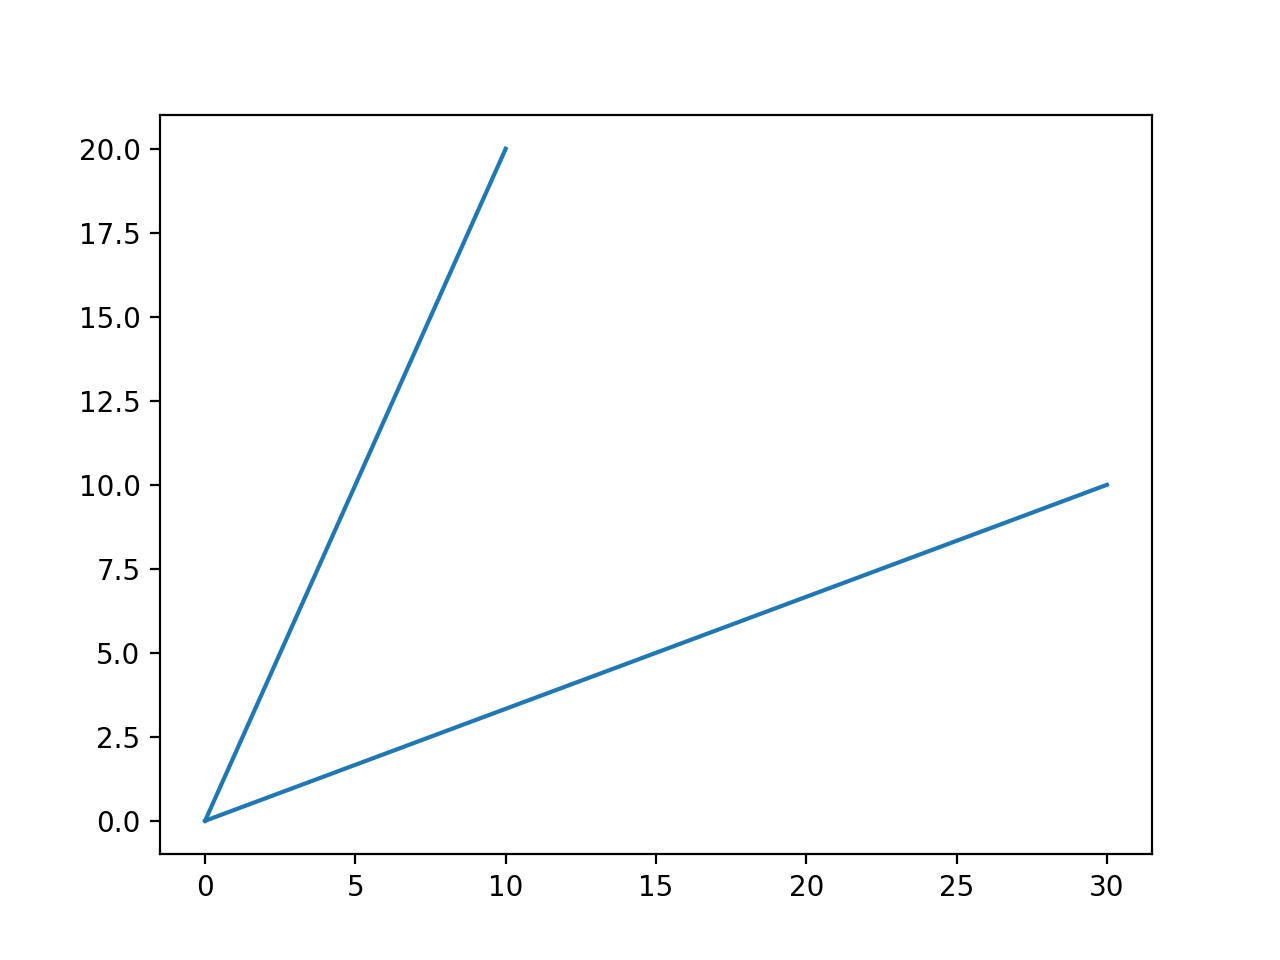

In [18]:
x1, x2 = np.array([1, 2]), np.array([3, 1])
theta1, theta2 = np.linspace(0, 10, 100), np.linspace(0, 10, 100)

plt.plot(*np.array([x1 * t for t in theta1]).T, color="tab:blue")
plt.plot(*np.array([x2 * t for t in theta2]).T, color="tab:blue")

Consider the cone
$$
    K = \{ (x_1,x_2) \mid 0 \leq x_1 \leq x_2 \} \subseteq \mathbf{R}^2
$$

<IPython.core.display.Javascript object>


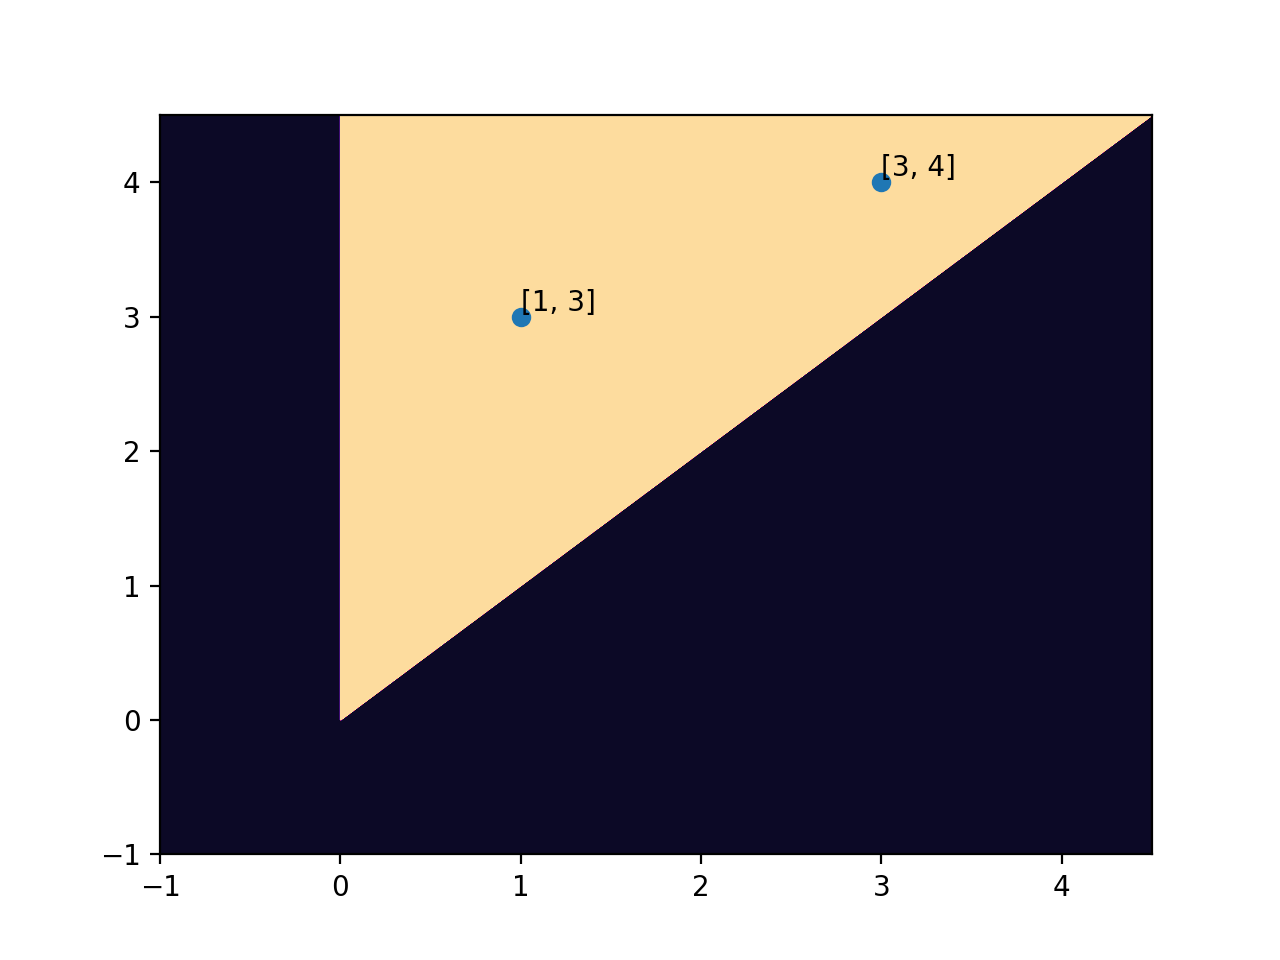

In [18]:
x1, x2 = np.linspace(-1, 4.5, 1000), np.linspace(-1, 4.5, 1000)
x1, x2 = np.meshgrid(x1, x2)
K = (x1 >= 0) * (x2 >= x1)

p1, p2 = [1, 3], [3, 4]
plt.contourf(x1, x2, K, cmap="magma")
plt.scatter(p1, p2)
for p in [p1, p2]:
    plt.text(*p, f"{p}", verticalalignment="bottom")

**2.6**

When does one halfspace contain another? Give conditions under which
$$
    \{a^Tx \leq b\} \subseteq \{\bar{a}^Tx \leq \bar{b}\}
$$

for $a, \hat a \neq 0$

In [55]:
def plot_halfspace(a1, a2, a3, b1, b2, b3):
    x1, x2 = np.linspace(-5, 5, 1000), np.linspace(-5, 5, 1000)
    x1, x2 = np.meshgrid(x1, x2)
    hp1 = (a1 * x1 - a2 * x2 <= a3)
    hp2 = (b1 * x1 - b2 * x2 <= b3)
    plt.contourf(x1, x2, hp1, alpha=0.5, cmap="Reds")
    plt.contourf(x1, x2, hp2, alpha=0.5, cmap="Blues")
    plt.arrow(0, 0, a1, -a2,  fc="tab:red", ec="tab:red", head_width=0.3, head_length=0.3)
    plt.arrow(0, 0, b1, -b2,  fc="tab:green", ec="tab:green", head_width=0.3, head_length=0.3)
    plt.show()

In [56]:
interact(plot_halfspace, a1=FloatSlider(min=-2, max=2), 
                         a2=FloatSlider(min=-2, max=2),
                         a3=FloatSlider(min=-5, max=5),
                         b1=FloatSlider(min=-2, max=2),
                         b2=FloatSlider(min=-2, max=2),
                         b3=FloatSlider(min=-5, max=5),)

interactive(children=(FloatSlider(value=0.0, description='a1', max=2.0, min=-2.0), FloatSlider(value=0.0, description='a2', max=2.0, min=-2.0), FloatSlider(value=0.0, description='a3', max=5.0, min=-5.0), FloatSlider(value=0.0, description='b1', max=2.0, min=-2.0), FloatSlider(value=0.0, description='b2', max=2.0, min=-2.0), FloatSlider(value=0.0, description='b3', max=5.0, min=-5.0), Output()), _dom_classes=('widget-interact',))

<function __main__.plot_halfspace>

In [62]:
def plot_halfspaces(x1, x2, hp1, hp2, ax):
    ax.contourf(x1, x2, hp1, alpha=0.7)
    ax.contourf(x1, x2, hp2, alpha=0.7)
    ax.arrow(0, 0, -1 / np.sqrt(2), 1/ np.sqrt(2), color="tab:red", head_width=0.2)
    ax.scatter(0,0, color="tab:red")
    ax.grid(alpha=0.5)

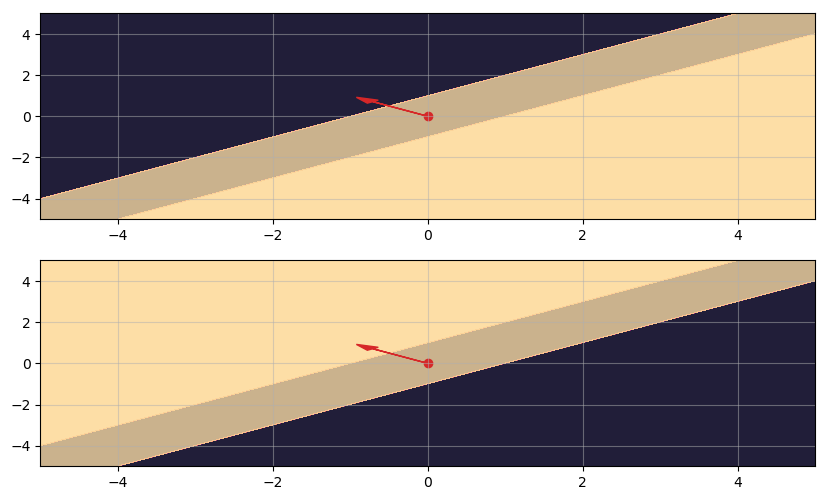

In [68]:
# One halfspace contain another if a == hat{a}, and b > hat{b}
# consider a == hat{a} == [-1, 1]^T in R2

fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

x1, x2 = np.linspace(-5, 5, 1000), np.linspace(-5, 5, 1000)
x1, x2 = np.meshgrid(x1, x2)
hp11 = -1 * x1 + 1 * x2 <= -1
hp12 = -1 * x1 + 1 * x2 <= 1

hp21 = 1 * x1 - 1 * x2 <= -1
hp22 = 1 * x1 - 1 * x2 <= 1

plot_halfspaces(x1, x2, hp11, hp12, ax1)
plot_halfspaces(x1, x2, hp21, hp22, ax2)

#plt.savefig("/Users/gerardoduran/Desktop/halfspaces.png")
plt.show()

**2.7: Voronoi description of a halfspace**

Let $a$, $b$ be distinct points in $\mathbb R^n$. Show that the set of all points that are closer (in Euclidean distance) to $a$ than $b$ is a halfspace. Describe it explicitly and draw a picture.

$$
    \{x \ | \ ||x - a||_2 \leq ||x-b||_2\}
$$

In [147]:
# As an example, let us consider two points in R2
from numpy.linalg import norm

a = np.array([2, 1])
b = np.array([0, 0])
x1, x2 = np.linspace(-3, 3, 500), np.linspace(-3, 3, 500)
x1, x2 = np.meshgrid(x1, x2)
distance_a = np.sqrt((a[0] - x1) ** 2 + (a[1] -  x2)**2)
distance_b = np.sqrt((b[0] - x1) ** 2 + (b[1] -  x2)**2)

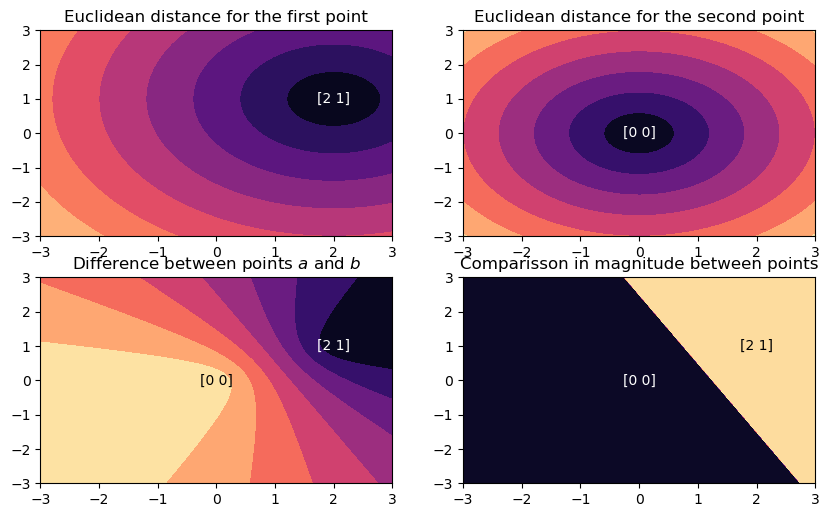

In [148]:
fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.set_title("Euclidean distance for the first point")
ax1.text(*a, a, color="white", horizontalalignment="center", verticalalignment="center")
ax1.contourf(x1, x2, distance_a);

ax2.set_title("Euclidean distance for the second point")
ax2.text(*b, b, color="white", horizontalalignment="center", verticalalignment="center")
ax2.contourf(x1, x2, distance_b);

ax3.set_title("Difference between points $a$ and $b$")
ax3.text(*b, b, color="black", horizontalalignment="center", verticalalignment="center")
ax3.text(*a, a, color="white", horizontalalignment="center", verticalalignment="center")
ax3.contourf(x1, x2, distance_a - distance_b);

ax4.set_title("Comparisson in magnitude between points")
ax4.text(*b, b, color="white", horizontalalignment="center", verticalalignment="center")
ax4.text(*a, a, color="black", horizontalalignment="center", verticalalignment="center")
ax4.contourf(x1, x2, distance_a - distance_b <= 0);

plt.savefig("/Users/gerardoduran/Desktop/voronoi.png")